In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df =pd.read_csv('/content/Housing.csv')
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df)
print(M)

extraInputs = True
normalizedData = False
standardizedData = True
trainingPercent = 0.8 
iterations = 1500
alpha = 0.005
regularization = 0.1 #don't use with a trainingPercent val of 0.5!


numTrainingRows= int(len(df)*trainingPercent)
print(numTrainingRows)

545
436


In [3]:
def stringToInt(input):
  return [1 if i == 'yes' else 0 for i in input]

In [4]:
def normalize(input):
    return [(i - min(input)) / (max(input) - min(input)) for i in input]

In [5]:
def standardize(input):
  mean = sum(input) / len(input)
  stddev = ( sum([((i - mean) ** 2) for i in input]) / len(input) ) ** 0.5
  return [(i - mean) / stddev for i in input]

In [6]:
def computeCost(xFeatures, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = xFeatures.dot(theta)
  
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors)

  #checks if this is being ran on the training or validation rows
  #if it's being ran on the training data, the regularization penalty is added to the cost
  #theta[1:] is taken so as to not include theta[0], or the offset, in the penalty
  if len(xFeatures) == numTrainingRows:
    regularizationPenalty = regularization * np.sum(np.square(theta[1:]))
  else:
    regularizationPenalty = 0

  J = 1 / (2 * numTrainingRows) * (np.sum(sqrErrors) + regularizationPenalty)

  
  return J 

In [7]:
def gradientDescent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  costHistory: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)  """ 
  costHistory = np.zeros(iterations)
  thetaHistory= np.zeros((iterations, features.shape[1]))
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / numTrainingRows) * X.transpose().dot(errors);
    thetaHistory[i] = theta
    theta = theta - sum_delta; 
    costHistory[i] = computeCost(X, y, theta)   
 
  return theta, costHistory ,thetaHistory

In [8]:
area = df.values[:, 1]
bedrooms = df.values[:, 2]
bathrooms = df.values[:, 3]
stories = df.values[:, 4]
parking = df.values[:, 10]


pricesTraining = df.values[:numTrainingRows, 0]
pricesValidation = df.values[numTrainingRows:,0]
print('area = ', area[:5])
print('bedrooms = ', bedrooms[: 5])
print('bathrooms = ', bathrooms[: 5])
print('stories = ', stories[: 5]) 
print('parking = ', parking[: 5])
print('training prices = ', pricesTraining[: 5])
print('validation prices = ', pricesValidation[: 5])

if extraInputs == True:
  mainroad = stringToInt(df.values[:, 5])
  guestroom = stringToInt(df.values[:, 6])
  basement = stringToInt(df.values[:, 7])
  hotwaterheating = stringToInt(df.values[:, 8])
  airconditioning = stringToInt(df.values[:, 9])
  prefarea = stringToInt(df.values[:, 11])



  print('mainroad = ', mainroad[:5])
  print('guestroom = ', guestroom[:5])
  print('basement = ', basement[:5])
  print('hotwaterheating = ', hotwaterheating[:5])
  print('airconditioning = ', airconditioning[:5])
  print('prefarea = ', prefarea[:5])

area =  [7420 8960 9960 7500 7420]
bedrooms =  [4 4 3 4 4]
bathrooms =  [2 4 2 2 1]
stories =  [3 4 2 2 2]
parking =  [2 3 2 3 2]
training prices =  [13300000 12250000 12250000 12215000 11410000]
validation prices =  [3290000 3290000 3255000 3255000 3234000]
mainroad =  [1, 1, 1, 1, 1]
guestroom =  [0, 0, 0, 0, 1]
basement =  [0, 0, 1, 1, 1]
hotwaterheating =  [0, 0, 0, 0, 0]
airconditioning =  [1, 1, 0, 1, 1]
prefarea =  [1, 0, 1, 1, 0]


In [9]:
if normalizedData == True:
  area = normalize(area)
  bedrooms = normalize(bedrooms)
  bathrooms = normalize(bathrooms)
  stories = normalize(stories)
  parking = normalize(parking)
  pricesTraining = normalize(pricesTraining)
  pricesValidation = normalize(pricesValidation)
  if extraInputs == True:
    mainroad = normalize(mainroad)
    guestroom = normalize(guestroom)
    basement = normalize(basement)
    hotwaterheating = normalize(hotwaterheating)
    airconditioning = normalize(airconditioning)
    prefarea = normalize(prefarea)
  print(area[:5])
  print(max(area))
  print(min(area))

In [10]:
if standardizedData == True:
  area = standardize(area)
  bedrooms = standardize(bedrooms)
  bathrooms = standardize(bathrooms)
  stories = standardize(stories)
  parking = standardize(parking)
  pricesTraining = standardize(pricesTraining)
  pricesValidation = standardize(pricesValidation)
  if extraInputs == True:
    mainroad = standardize(mainroad)
    guestroom = standardize(guestroom)
    basement = standardize(basement)
    hotwaterheating = standardize(hotwaterheating)
    airconditioning = standardize(airconditioning)
    prefarea = standardize(prefarea)
  print(area[:5])
  print(max(area))
  print(min(area))

[1.0467262882352135, 1.7570095257333962, 2.2182324072257225, 1.0836241187545996, 1.0467262882352135]
5.09626318773784
-1.61452973797551


Text(0.5, 1.0, 'Scatter Plot of Standardized Data with Part A and B Columns')

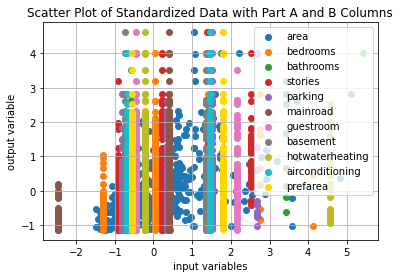

In [11]:
plt.scatter(area[:numTrainingRows],pricesTraining,color='tab:blue',label='area')
plt.scatter(bedrooms[:numTrainingRows],pricesTraining,color='tab:orange',label='bedrooms')
plt.scatter(bathrooms[:numTrainingRows],pricesTraining,color='tab:green',label='bathrooms')
plt.scatter(stories[:numTrainingRows],pricesTraining,color='tab:red',label='stories')
plt.scatter(parking[:numTrainingRows],pricesTraining,color='tab:purple',label='parking')

if extraInputs == True:
  plt.scatter(mainroad[:numTrainingRows],pricesTraining,color='tab:brown',label='mainroad')
  plt.scatter(guestroom[:numTrainingRows],pricesTraining,color='tab:pink',label='guestroom')
  plt.scatter(basement[:numTrainingRows],pricesTraining,color='tab:gray',label='basement')
  plt.scatter(hotwaterheating[:numTrainingRows],pricesTraining,color='tab:olive',label='hotwaterheating')
  plt.scatter(airconditioning[:numTrainingRows],pricesTraining,color='tab:cyan',label='airconditioning')
  plt.scatter(prefarea[:numTrainingRows],pricesTraining,color='gold',label='prefarea')

plt.grid() 
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('input variables')
plt.ylabel('output variable')
plt.title('Scatter Plot of Processed Training Data')
plt.legend()

#all these if-statements just determine the title of the plot for the report
if standardizedData == True:
  dataProcessingTitle = 'Standardized Data'
elif normalizedData == True:
  dataProcessingTitle = 'Normalized Data'
else:
  dataProcessingTitle = 'Raw Data'

dataExtraTitle = ' with Part A Columns'
if extraInputs == True:
  dataExtraTitle = ' with Part A and B Columns'

plt.title('Scatter Plot of ' + dataProcessingTitle + dataExtraTitle)

In [12]:
xOnes = np.ones((M, 1)) 
xOnes[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [13]:
areaVertical = np.array(area).reshape((M, 1))
bedroomsVertical = np.array(bedrooms).reshape((M, 1))
bathroomsVertical = np.array(bathrooms).reshape((M, 1))
storiesVertical = np.array(stories).reshape((M, 1))
parkingVertical = np.array(parking).reshape((M, 1))

if extraInputs == True:
  mainroadVertical = np.array(mainroad).reshape((M, 1))
  guestroomVertical = np.array(guestroom).reshape((M, 1))
  basementVertical = np.array(basement).reshape((M, 1))
  hotwaterheatingVertical = np.array(hotwaterheating).reshape((M, 1))
  airconditioningVertical = np.array(airconditioning).reshape((M, 1))
  prefareaVertical = np.array(prefarea).reshape((M, 1))

print(areaVertical[:5])

[[1.04672629]
 [1.75700953]
 [2.21823241]
 [1.08362412]
 [1.04672629]]


In [14]:
areaFeatures = np.hstack((xOnes,areaVertical))
bedroomsFeatures = np.hstack((xOnes,bedroomsVertical))
bathroomsFeatures = np.hstack((xOnes,bathroomsVertical))
storiesFeatures = np.hstack((xOnes,storiesVertical))
parkingFeatures = np.hstack((xOnes,parkingVertical))

if extraInputs == True:
  mainroadFeatures = np.hstack((xOnes,mainroadVertical))
  guestroomFeatures = np.hstack((xOnes,guestroomVertical))
  basementFeatures = np.hstack((xOnes,basementVertical))
  hotwaterheatingFeatures = np.hstack((xOnes,hotwaterheatingVertical))
  airconditioningFeatures = np.hstack((xOnes,airconditioningVertical))
  prefareaFeatures = np.hstack((xOnes,prefareaVertical))

areaFeatures[:5]

array([[1.        , 1.04672629],
       [1.        , 1.75700953],
       [1.        , 2.21823241],
       [1.        , 1.08362412],
       [1.        , 1.04672629]])

In [15]:
features = np.hstack((xOnes,areaVertical,bedroomsVertical,bathroomsVertical,storiesVertical,parkingVertical))

if extraInputs == True:
  features = np.hstack((features,mainroadFeatures,guestroomFeatures,basementFeatures,hotwaterheatingFeatures,airconditioningFeatures,prefareaFeatures))

features[:5]

array([[ 1.        ,  1.04672629,  1.40341936,  1.42181174,  1.37821692,
         1.51769249,  1.        ,  0.40562287,  1.        , -0.46531479,
         1.        , -0.73453933,  1.        , -0.2192645 ,  1.        ,
         1.4726183 ,  1.        ,  1.80494113],
       [ 1.        ,  1.75700953,  1.40341936,  5.40580863,  2.53202371,
         2.67940935,  1.        ,  0.40562287,  1.        , -0.46531479,
         1.        , -0.73453933,  1.        , -0.2192645 ,  1.        ,
         1.4726183 ,  1.        , -0.55403469],
       [ 1.        ,  2.21823241,  0.04727831,  1.42181174,  0.22441013,
         1.51769249,  1.        ,  0.40562287,  1.        , -0.46531479,
         1.        ,  1.3613975 ,  1.        , -0.2192645 ,  1.        ,
        -0.67906259,  1.        ,  1.80494113],
       [ 1.        ,  1.08362412,  1.40341936,  1.42181174,  0.22441013,
         2.67940935,  1.        ,  0.40562287,  1.        , -0.46531479,
         1.        ,  1.3613975 ,  1.        , -0.219

In [16]:
theta = np.zeros(features.shape[1])
theta[:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [17]:
cost = computeCost(features[:numTrainingRows], pricesTraining, theta) 
print('The cost for given values of theta =', cost) 

The cost for given values of theta = 0.5000000000000006


In [18]:
theta = np.zeros(features.shape[1])

In [19]:
newTheta, trainingCostHistory, thetaHistory = gradientDescent(features[:numTrainingRows], pricesTraining, theta, alpha, iterations) 

print('Final value of areaTheta =', newTheta) 
print('costHistory =', trainingCostHistory)

Final value of areaTheta = [-0.02861913  0.28623311  0.04995571  0.28204667  0.21897398  0.13653444
 -0.02861913  0.10556046 -0.02861913  0.06399976 -0.02861913  0.08579936
 -0.02861913  0.10684932 -0.02861913  0.2088319  -0.02861913  0.13134662]
costHistory = [0.49399281 0.48811563 0.48236509 ... 0.19708617 0.19708616 0.19708614]


Validation Data Training:

In [20]:
validationCostHistory = np.zeros(iterations)
for i in range(iterations):
  validationCostHistory[i] = computeCost(features[numTrainingRows:],pricesValidation,thetaHistory[i])

print('validationCostHistory =', validationCostHistory)

validationCostHistory = [0.125      0.12478194 0.12458637 ... 0.24458691 0.24458702 0.24458713]


Text(0.5, 1.0, 'Training Vs. Validation Loss on Standardized Data with Regularization with Part A and B Columns')

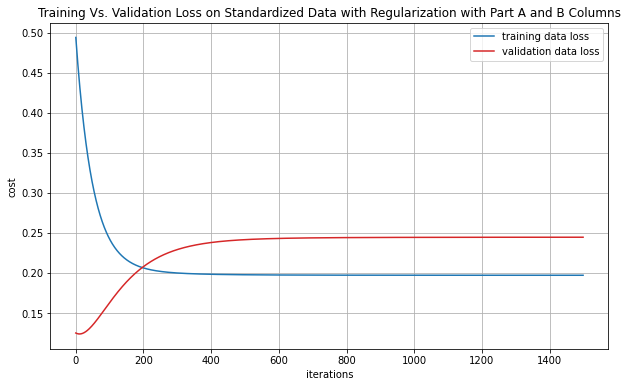

In [21]:
plt.plot(trainingCostHistory,color='tab:blue',label='training data loss')
plt.plot(validationCostHistory,color='tab:red',label='validation data loss')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.legend()

#all these if-statements just determine the title of the graph for the report
if standardizedData == True:
  dataProcessingTitle = 'Standardized Data'
elif normalizedData == True:
  dataProcessingTitle = 'Normalized Data'
else:
  dataProcessingTitle = 'Raw Data'

dataExtraTitle = ' with Part A Columns'
if extraInputs == True:
  dataExtraTitle = ' with Part A and B Columns'

dataRegTitle = ''
if not regularization == 0:
  dataRegTitle = ' with Regularization'

plt.title('Training Vs. Validation Loss on ' + dataProcessingTitle + dataRegTitle + dataExtraTitle)